In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import datetime
import time
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from PIL import ImageTk, Image

In [3]:
df = pd.read_csv('Istanbul Weather Data.csv')

In [24]:
print(df.head())
print(df.shape)

    DateTime             Condition  Rain  MaxTemp  MinTemp  SunRise  SunSet  \
0 2019-09-02         Partly cloudy   0.0       27       22      392    1177   
1 2019-09-01         Partly cloudy   0.0       27       22      391    1178   
2 2019-08-31  Patchy rain possible   0.5       26       22      390    1180   
3 2019-08-30         Partly cloudy   0.0       27       22      389    1182   
4 2019-08-29         Partly cloudy   0.0       27       23      387    1183   

   MoonRise  MoonSet  AvgWind  AvgHumidity  AvgPressure  Day  Month  Year  \
0       592     1305       23           66         1012    2      9  2019   
1       517     1273       21           66         1011    1      9  2019   
2       441     1240       22           63         1015   31      8  2019   
3       364     1205       20           64         1016   30      8  2019   
4       287     1166       24           61         1015   29      8  2019   

   Kategori  
0         0  
1         0  
2         2  
3     

In [5]:
df=df.dropna(axis=1, how='all')
null_values=df.isnull().sum()
print(null_values.sum())

263


In [6]:
for colName in df.columns:
    df[colName] = df[colName].fillna(df[colName].value_counts().index[0])

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])  # Tarih sütununu datetime veri tipine dönüştürün
df['Day'] = df['DateTime'].dt.day  # Gün bilgisini elde edin
df['Month'] = df['DateTime'].dt.month  # Ay bilgisini elde edin
df['Year'] = df['DateTime'].dt.year  # Yıl bilgisini elde edin
data = df.drop(['DateTime'], axis=1)  # Tarih sütununu kaldırın

In [7]:
df["DateTime"]=pd.to_datetime(df["DateTime"],format= '%d.%m.%Y').values.astype(np.int64)
df["SunRise"] = df['SunRise'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df["SunSet"] = df['SunSet'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df["MoonRise"] = df['MoonRise'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df["MoonSet"] = df['MoonSet'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [9]:
df = pd.concat([df,pd.DataFrame(columns=["Kategori"])],axis=1)

In [10]:
df.loc[df["Condition"]=="Torrential rain shower","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Heavy rain at times","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Light rain shower","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Moderate or heavy rain shower","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Moderate or heavy rain with thunder","Kategori"]="Siddetli Yagmurlu"
df.loc[df["Condition"]=="Sunny","Kategori"]="Gunesli"
df.loc[df["Condition"]=="Partly cloudy","Kategori"]="Bulutlu"
df.loc[df["Condition"]=="Cloudy","Kategori"]="Bulutlu"
df.loc[df["Condition"]=="Overcast","Kategori"]="Bulutlu"
df.loc[df["Condition"]=="Patchy rain possible","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Light rain","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Patchy light rain with thunder","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Moderate rain","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Light drizzle","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Light sleet","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Moderate rain at times","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Patchy light drizzle","Kategori"]="Hafif Yagmurlu"
df.loc[df["Condition"]=="Moderate snow","Kategori"]="Karlı"
df.loc[df["Condition"]=="Moderate or heavy snow showers","Kategori"]="Karlı"
df.loc[df["Condition"]=="Moderate or heavy sleet","Kategori"]="Karlı"
df.loc[df["Condition"]=="Fog","Kategori"]="Sisli"
df.loc[df["Condition"]=="Mist","Kategori"]="Sisli"

In [11]:
le = preprocessing.LabelEncoder()
le.fit(df["Kategori"])
df["Kategori"]=le.transform(df["Kategori"])

In [12]:
y = df['Kategori'].values
X = df.drop(columns=['Condition','Kategori']).values

In [13]:
df['Kategori'].value_counts()

1    2242
0    1466
2      86
6      53
4      38
5       7
3       4
Name: Kategori, dtype: int64

In [14]:
df_yeni = df.drop(columns=['Kategori','Condition'])

In [26]:
y = df['Kategori'].values
X = df_yeni.values

In [27]:
print(X.shape)
print(y.shape)

(3896, 14)
(3896,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3116, 14)
(3116,)
(780, 14)
(780,)


In [30]:
accuracy_values=[]

In [31]:
precision_values=[]

In [32]:
coef_values=[]

In [33]:
fscore_values=[]

In [34]:
print('Decision Tree')
dtc = DecisionTreeClassifier(random_state=1)

parameters={'criterion': ["gini", "entropy", "log_loss"]}

model = GridSearchCV(dtc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix1 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix1)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix1 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix1)

decisiontree_accuracy=accuracy
accuracy_values.append(decisiontree_accuracy)

decisiontree_precision=precision
precision_values.append(decisiontree_precision)

decisiontree_coef=coef
coef_values.append(decisiontree_coef)

decisiontree_fscore=fscore
fscore_values.append(decisiontree_fscore)
    
#decisiontree_function()

# Giriş değerlerini uygun formata dönüştürme
max_temp = float(input("MaxTemp değerini girin: "))
min_temp = float(input("MinTemp değerini girin: "))
gün = int(input("Gün değerini girin: "))
ay = int(input("Ay değerini girin: "))
yıl = int(input("Yıl değerini girin: "))
avgwind = int(input("Wind değerini girin: "))

# Giriş değerlerini uygun formata dönüştürme
X_tahmin = np.array([[max_temp, min_temp, gün, ay, yıl, avgwind]])

# Tahmini gerçekleştirme
tahmin = model.predict(X_tahmin)

if tahmin == 0:
    print("Tahmin edilen hava durumu: siddetli yagmurlu")
if tahmin == 1:
    print("Tahmin edilen hava durumu: gunesli")
if tahmin == 2:
    print("Tahmin edilen hava durumu: bulutlu")
if tahmin == 3:
    print("Tahmin edilen hava durumu: hafif yagmurlu")
if tahmin == 4:
    print("Tahmin edilen hava durumu: karli")
if tahmin == 5:
    print("Tahmin edilen hava durumu: sisli")

Decision Tree
Fitting 4 folds for each of 3 candidates, totalling 12 fits


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\base.py", li

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [22]:
print('Random Forest')
rfc = RandomForestClassifier()

parameters={'n_estimators': [10, 25, 50],
                   'criterion': ["gini", "entropy", "log_loss"],
                   'max_features': ["sqrt", "log2"]}

model = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix2 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix2)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix2 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix2)

randomforest_accuracy=accuracy
accuracy_values.append(randomforest_accuracy)

randomforest1_precision=precision
precision_values.append(randomforest1_precision)

randomforest1_coef=coef
coef_values.append(randomforest1_coef)

randomforest1_fscore=fscore
fscore_values.append(randomforest1_fscore)
    
    
#randomforest1_function()

Random Forest
Fitting 4 folds for each of 18 candidates, totalling 72 fits


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\jo

TRAIN RESULTS
Train Accuracy: 1.000
Train Precision: 0.999
Train Recall 1.000
Train F1 Score: 1.000
Train Correlation Coefficient 1.000
Confusion matrix:
[[1173    1    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0    0   74    0    0    0    0]
 [   0    0    0    4    0    0    0]
 [   0    0    0    0   32    0    0]
 [   0    0    0    0    0    6    0]
 [   0    0    0    0    0    0   43]]
TEST RESULTS
Test Accuracy: 0.800
Test Precision: 0.845
Test Recall 0.865
Train F1 Score: 0.791
Test Correlation Coefficient 0.318
Confusion matrix:
[[222  68   2   0   0   0]
 [ 62 397   0   0   0   0]
 [  5   2   5   0   0   0]
 [  4   0   2   0   0   0]
 [  1   0   0   0   0   0]
 [  6   3   1   0   0   0]]


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print('Random Forest')
rfc = RandomForestClassifier()

parameters={'n_estimators': [200, 350, 500],
                   'criterion': ["gini", "entropy", "log_loss"],
                   'max_features': ["sqrt", "log2"]}

model = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix3 = confusion_matrix(y_train, y_predict)
f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix3)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix3 = confusion_matrix(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix3)

randomforest2_accuracy=accuracy
accuracy_values.append(randomforest2_accuracy)

randomforest2_precision=precision
precision_values.append(randomforest2_precision)

randomforest2_coef=coef
coef_values.append(randomforest2_coef)

randomforest2_fscore=fscore
fscore_values.append(randomforest2_fscore)
    
#randomforest2_function()

Random Forest
Fitting 4 folds for each of 18 candidates, totalling 72 fits


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zeeyn\anaconda3\lib\site-packages\jo

TRAIN RESULTS
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall 1.000
Train F1 Score: 1.000
Train Correlation Coefficient 1.000
Confusion matrix:
[[1174    0    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0    0   74    0    0    0    0]
 [   0    0    0    4    0    0    0]
 [   0    0    0    0   32    0    0]
 [   0    0    0    0    0    6    0]
 [   0    0    0    0    0    0   43]]
TEST RESULTS
Test Accuracy: 0.804
Test Precision: 0.845
Test Recall 0.865
Train F1 Score: 0.794
Test Correlation Coefficient 0.365
Confusion matrix:
[[225  67   0   0   0   0]
 [ 62 397   0   0   0   0]
 [  5   2   5   0   0   0]
 [  3   0   3   0   0   0]
 [  1   0   0   0   0   0]
 [  5   4   1   0   0   0]]


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print('MLP')
mlc = MLPClassifier(random_state=1, early_stopping=True)
# MLP
parameters={'learning_rate': ["constant", "invscaling", "adaptive"],
                   'hidden_layer_sizes': [(10, 5), (15, 10), (20, 15), (100,), (100, 50, 25)],
                   'activation': ["logistic", "relu", "tanh"]}

model = GridSearchCV(mlc, parameters, n_jobs=-1, verbose=1, cv=4)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
coef = np.corrcoef(y_predict, y_train)
accuracy = accuracy_score(y_train, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict)
conf_matrix4 = confusion_matrix(y_train, y_predict)
#f1 = f1_score(y_train, y_predict, average='weighted')

print('TRAIN RESULTS')
print('Train Accuracy: {:.3f}'.format(accuracy))
print('Train Precision: {:.3f}'.format(precision[1]))
print('Train Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Train Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix4)

y_predict = model.predict(X_test)
coef = np.corrcoef(y_predict, y_test)
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
conf_matrix4 = confusion_matrix(y_test, y_predict)
#f1 = f1_score(y_test, y_predict, average='weighted')

print('TEST RESULTS')
print('Test Accuracy: {:.3f}'.format(accuracy))
print('Test Precision: {:.3f}'.format(precision[1]))
print('Test Recall {:.3f}'.format(recall[1]))
print("Train F1 Score: {:.3f}".format(f1))
print('Test Correlation Coefficient {:.3f}'.format(coef[0,1]))
print('Confusion matrix:')
print(conf_matrix4)

mlp_accuracy=accuracy
accuracy_values.append(mlp_accuracy)

mlp_precision=precision
precision_values.append(mlp_precision)

mlp_coef=coef
coef_values.append(mlp_coef)

mlp_fscore=fscore
fscore_values.append(mlp_fscore)
    
#mlp_function()

MLP
Fitting 4 folds for each of 45 candidates, totalling 180 fits
TRAIN RESULTS
Train Accuracy: 0.572
Train Precision: 0.572
Train Recall 1.000
Train F1 Score: 0.794
Train Correlation Coefficient nan
Confusion matrix:
[[   0 1174    0    0    0    0    0]
 [   0 1783    0    0    0    0    0]
 [   0   74    0    0    0    0    0]
 [   0    4    0    0    0    0    0]
 [   0   32    0    0    0    0    0]
 [   0    6    0    0    0    0    0]
 [   0   43    0    0    0    0    0]]
TEST RESULTS
Test Accuracy: 0.588
Test Precision: 0.588
Test Recall 1.000
Train F1 Score: 0.794
Test Correlation Coefficient nan
Confusion matrix:
[[  0 292   0   0   0   0]
 [  0 459   0   0   0   0]
 [  0  12   0   0   0   0]
 [  0   6   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0  10   0   0   0   0]]


C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zeeyn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\metrics\_c

In [25]:
def decisiontree_function():
    
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Decision Tree")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix1, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()

    

def randomforest1_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Random Forest 1")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix2, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()


    

def randomforest2_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Random Forest 2")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix3, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()


    

def mlp_function():
    frame = tk.Toplevel(window)
    frame.title("Heatmap of Multi Layer Perceptron")

    fig = Figure(figsize=(7, 6), dpi=100)
    ax = fig.add_subplot(111)

    sns.heatmap(conf_matrix4, cmap="Blues", annot=True, fmt="d", xticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], yticklabels=["siddetli y.","gunesli","bulutlu","hafif y.","karlı","sisli"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

    toolbar = NavigationToolbar2Tk(canvas, frame)
    toolbar.update()
    canvas.get_tk_widget().pack()


In [26]:
algorithm_names=["Desicion Tree", "Random Forest 1", "Random Forest 2", "MLP"]

In [27]:
print(accuracy_values)

[0.7102564102564103, 0.8, 0.8038461538461539, 0.5884615384615385]


In [28]:
print(precision_values)

[array([0.64310954, 0.7987013 , 0.11111111, 0.        , 0.28571429,
       0.        , 0.        ]), array([0.74      , 0.84468085, 0.5       , 0.        , 0.        ,
       0.        ]), array([0.74750831, 0.84468085, 0.55555556, 0.        , 0.        ,
       0.        ]), array([0.        , 0.58846154, 0.        , 0.        , 0.        ,
       0.        ])]


In [29]:
print(coef_values)

[array([[1.        , 0.09706747],
       [0.09706747, 1.        ]]), array([[1.        , 0.31756655],
       [0.31756655, 1.        ]]), array([[1.        , 0.36453384],
       [0.36453384, 1.        ]]), array([[nan, nan],
       [nan,  1.]])]


In [30]:
print(fscore_values)

[array([0.63304348, 0.80130293, 0.0952381 , 0.        , 0.30769231,
       0.        , 0.        ]), array([0.75      , 0.85468245, 0.45454545, 0.        , 0.        ,
       0.        ]), array([0.75885329, 0.85468245, 0.47619048, 0.        , 0.        ,
       0.        ]), array([0.       , 0.7409201, 0.       , 0.       , 0.       , 0.       ])]


In [31]:
def comparison():

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(algorithm_names, accuracy_values)
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy Values")
    plt.title("Accuracy Values of Machine Learning Algorithms")

    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Accuracy Values of Machine Learning Algorithms")
    window.geometry("700x500")

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [32]:
def decisiontreevalues():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Decision Tree Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[0])
    precision_text = "Precision: " + str(precision_values[0][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[0][0][1])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [33]:
def randomforest1values():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Random Forest 1 Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[1])
    precision_text = "Precision: " + str(precision_values[1][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[1][1][0])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [34]:
def randomforest2values():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("Random Forest 2 Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[2])
    precision_text = "Precision: " + str(precision_values[2][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[2][1][0])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

In [35]:
def mlpvalues():
    # Creating a new window for the plot
    window = tk.Toplevel()
    window.title("MLP Values")
    window.geometry("400x500")
    window.configure(background="lightblue")
    
    accuracy_text = "Accuracy: " + str(accuracy_values[3])
    precision_text = "Precision: " + str(precision_values[3][1])
    coef_text = "Correlation Coefficient: " + str(coef_values[3][1][0])
    fscore_text = "F1 Score: " + str(fscore_values[0][0])
    
    label1 = tk.Label(window, text=accuracy_text, fg="dark blue")
    label1.pack()
    
    label2 = tk.Label(window, text=precision_text, fg="dark blue")
    label2.pack()
    
    label3 = tk.Label(window, text=coef_text, fg="dark blue")
    label3.pack()
    
    label4 = tk.Label(window, text=fscore_text, fg="dark blue")
    label4.pack()

    # Embedding the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    # Adding a toolbar for navigation
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    canvas.get_tk_widget().pack()

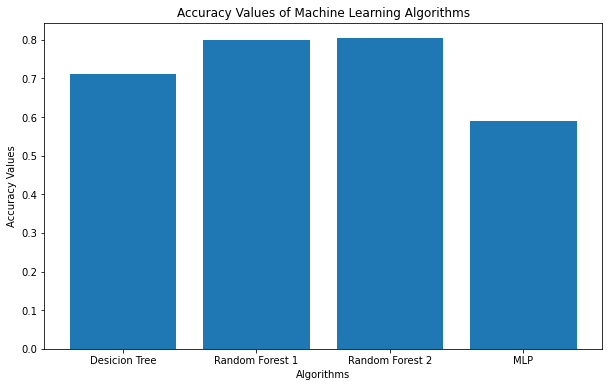

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_values)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Values")
plt.title("Accuracy Values of Machine Learning Algorithms")
plt.show()

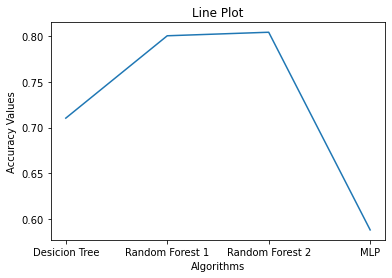

In [37]:
plt.plot(algorithm_names, accuracy_values)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Values')
plt.title('Line Plot')
plt.show()

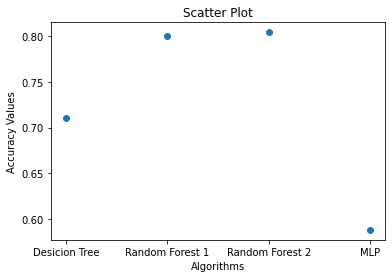

In [38]:
plt.scatter(algorithm_names, accuracy_values)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Values')
plt.title('Scatter Plot')
plt.show()

In [39]:
def get_row_info():
    try:
        row_index = int(entry.get()) - 1  # Kullanıcıdan alınan sayıyı satır indeksi olarak kullanıyoruz
        row = df.iloc[row_index]  # İlgili satırı seçiyoruz

        # Satır bilgilerini gösteren bir mesaj kutusu oluşturuyoruz
        message = f"DateTime: {row['DateTime']}\nCondition: {row['Condition']}\nRain: {row['Rain']}\nMaxTemp: {row['MaxTemp']}\nMinTemp: {row['MinTemp']}\nSunRise: {row['SunRise']}\nSunSet: {row['SunSet']}\nMoonRise: {row['MoonRise']}\nMoonSet: {row['MoonSet']}\nAvgWind: {row['AvgWind']}\nAvgHumidity: {row['AvgHumidity']}\nAvgPressure: {row['AvgPressure']}\nKategori: {row['Kategori']}"
        tk.messagebox.showinfo("Satır Bilgileri", message)
    except Exception as e:
        tk.messagebox.showerror("Hata", "Geçersiz giriş!")

#root = tk.Tk()

In [40]:
def exit_program():
    window.destroy()

In [43]:
window = tk.Tk()
window.title("WEATHER CONDITION")
window.geometry("400x500")
window.configure(background="lightblue")

label = tk.Label(window, text="Please choose any machine learning algorithm or enter a number", fg="dark blue")
label.place(x=23,y=90)

entry = tk.Entry(window)
entry.place(x=136,y=111)

button = tk.Button(window, text="Get Info", command=get_row_info)
button.place(x=171,y=130)

button2 = tk.Button(window, text="Decision Tree Heatmap", command=decisiontree_function, relief="groove")
button2.place(x=23,y=200)

button3 = tk.Button(window, text="Random Forest 1 Heatmap", command=randomforest1_function, relief="groove")
button3.place(x=23,y=250)

button4 = tk.Button(window, text="Random Forest 2 Heatmap", command=randomforest2_function, relief="groove")
button4.place(x=23,y=300)

button5 = tk.Button(window, text="MLP Heatmap", command=mlp_function, relief="groove")
button5.place(x=23,y=350)

button6 = tk.Button(window, text="Comparison of all algorithms", command=comparison, relief ="groove")
button6.place(x=120,y=400)

button7 = tk.Button(window, text="Decision Tree Values", command=decisiontreevalues, relief="groove")
button7.place(x=230,y=200)

button8 = tk.Button(window, text="Random Forest 1 Values", command=randomforest1values, relief="groove")
button8.place(x=230,y=250)

button9 = tk.Button(window, text="Random Forest 2 Values", command=randomforest2values, relief="groove")
button9.place(x=230,y=300)

button9 = tk.Button(window, text="MLP Values", command=mlpvalues, relief="groove")
button9.place(x=230,y=350)

button10 = tk.Button(window, text="Exit", command=exit_program, relief="groove")
button10.place(x=180,y=450)

window.mainloop()